In [1488]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from category_encoders import HashingEncoder
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
sns.set()

In [1489]:
df=pd.concat([df_train,df_test])
df=df.reset_index(drop=True)


In [1490]:
df.drop(['Name','Cabin'],axis=1,inplace=True)
df_cols=df.columns.to_list()
df_cols.pop()
num_cols=df.select_dtypes('float64').columns.to_list()
object_cols=df.select_dtypes('object').columns.to_list()

In [1492]:
object_pipeline=Pipeline([('fillina',SimpleImputer(strategy='most_frequent')),('Scaler',OrdinalEncoder())])
num_pipeline=Pipeline([('fillina',KNNImputer(n_neighbors=10))])


In [1493]:
df[['HomePlanet','CryoSleep','Destination','VIP']]=object_pipeline.fit_transform(df[['HomePlanet','CryoSleep','Destination','VIP']])
df['Transported']=OrdinalEncoder().fit_transform(df['Transported'].to_numpy().reshape(-1,1))


In [1494]:
df[df_cols]=num_pipeline.fit_transform(df[df_cols])

<AxesSubplot:>

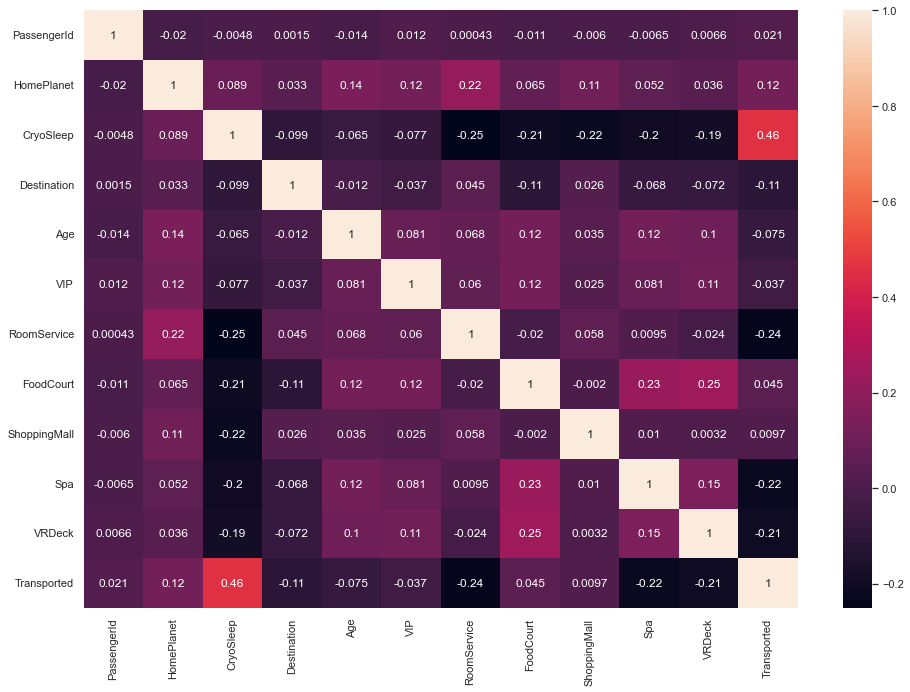

In [1495]:
sns.set(rc={'figure.figsize':(16,11)})
sns.heatmap(df.corr(),annot=True)

In [1496]:
df_train=df[:8693]
df_test=df[8693:]

In [1497]:
df['Destination_CryoSleep']=df['CryoSleep']*df['Destination']
df.drop(['Destination'],axis=1,inplace=True)
df['VIP_CryoSleep']=df['CryoSleep']+df['VIP']
df.drop(['VIP'],axis=1,inplace=True)
df['VRDeck_CryoSleep']=df['CryoSleep']+df['VRDeck']
df['Spa_CryoSleep']=df['CryoSleep']+df['Spa']
df['RoomService_CryoSleep']=df['CryoSleep']+df['RoomService']

In [1498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            12970 non-null  float64
 1   HomePlanet             12970 non-null  float64
 2   CryoSleep              12970 non-null  float64
 3   Age                    12970 non-null  float64
 4   RoomService            12970 non-null  float64
 5   FoodCourt              12970 non-null  float64
 6   ShoppingMall           12970 non-null  float64
 7   Spa                    12970 non-null  float64
 8   VRDeck                 12970 non-null  float64
 9   Transported            8693 non-null   float64
 10  Destination_CryoSleep  12970 non-null  float64
 11  VIP_CryoSleep          12970 non-null  float64
 12  VRDeck_CryoSleep       12970 non-null  float64
 13  Spa_CryoSleep          12970 non-null  float64
 14  RoomService_CryoSleep  12970 non-null  float64
dtypes:

In [1499]:
df['bill']=(df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck'])

cols_df=df.columns.to_list()
cols_df.pop(4)
df[cols_df]=MinMaxScaler().fit_transform(df[cols_df])
df.drop(['Age','FoodCourt','PassengerId','ShoppingMall','HomePlanet','Spa','VRDeck','RoomService'],axis=1,inplace=True)


In [1501]:
object_cols.remove('PassengerId')
object_cols.remove('Destination')
object_cols.remove('VIP')

<AxesSubplot:>

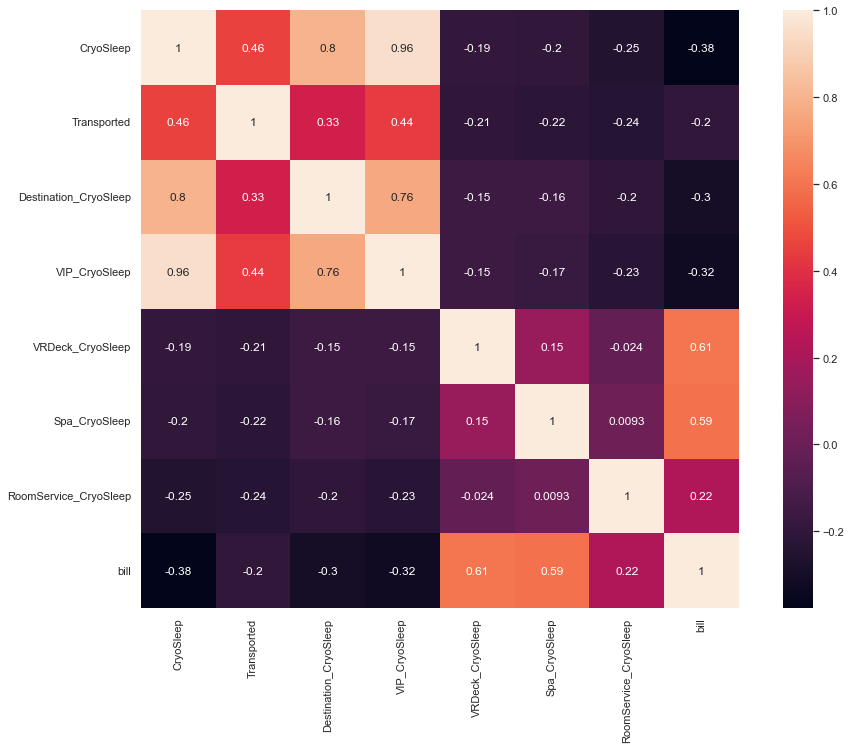

In [1503]:
sns.set(rc={'figure.figsize':(16,11)})
sns.heatmap(df.corr(),annot=True,square=True)

In [1506]:
df_train=df[:8693]
df_test=df[8693:]
x=df_train.drop(['Transported'],axis=1)
x=df_train.drop(['Transported'],axis=1)
y=df_train['Transported']

In [1507]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42)
from sklearn.ensemble import BaggingClassifier
model=GradientBoostingClassifier()
modelL=BaggingClassifier(GradientBoostingClassifier(),n_estimators=21)
modelL.fit(x_train,y_train)
print(modelL.score(x_test,y_test))


0.7890314020344981


In [1508]:
df_test.drop('Transported',axis=1,inplace=True)

C:\Users\amavi\AppData\Local\Temp\ipykernel_58060\879673850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Transported',axis=1,inplace=True)


In [1509]:
pred={}
acc=0
for i in range(500):
    modelBG=BaggingClassifier(GradientBoostingClassifier(),n_estimators=21)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42)
    modelBG.fit(x_train,y_train)
    pred[f'{i}']=modelBG.predict(df_test)
   

In [1514]:
predict=pd.DataFrame(pred)
predict

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4274,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4275,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [1525]:
predictions=[]
for i in range(4277):
   
    predictions.append(predict.iloc[i].mode()[0])

In [1531]:
predictions=np.array(predictions)
predictions.astype('bool')

array([ True, False,  True, ...,  True,  True,  True])